<a href="https://colab.research.google.com/github/ronaldodeschain/rd_colab/blob/main/Alura_Care_Lidando_com_dados_de_multiplas_dimens%C3%B5es.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
#arquivo no github
uri = "arquivo.csv"
resultados_exames = pd.read_csv(uri)
resultados_exames.head()

,id,diagnostico,exame_1,exame_2,exame_3,exame_4,exame_5,exame_6,exame_7,exame_8,...,exame_24,exame_25,exame_26,exame_27,exame_28,exame_29,exame_30,exame_31,exame_32,exame_33
0,842302,M,17.99,10.38,122.80,103.78,1001.0,0.11840,0.27760,0.3001,...,184.60,2019.0,0.1622,0.6656,0.7119,0.786,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,103.78,1326.0,0.08474,0.07864,0.0869,...,158.80,1956.0,0.1238,0.1866,0.2416,0.786,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,103.78,1203.0,0.10960,0.15990,0.1974,...,152.50,1709.0,0.1444,0.4245,0.4504,0.786,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,103.78,386.1,0.14250,0.28390,0.2414,...,98.87,567.7,0.2098,0.8663,0.6869,0.786,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,103.78,1297.0,0.10030,0.13280,0.1980,...,152.20,1575.0,0.1374,0.2050,0.4000,0.786,0.1625,0.2364,0.07678,0.854454


In [2]:
#treinar o modelo
from sklearn.model_selection import train_test_split
from numpy import random
SEED = 123143
random.seed(SEED)
#criação de variáveis
valores_exames = resultados_exames.drop(columns=['id','diagnostico'])
diagnostico = resultados_exames.diagnostico
valores_exames_v1 = valores_exames.drop(columns= 'exame_33')

treino_x,teste_x,treino_y,teste_y = train_test_split(valores_exames_v1,diagnostico,test_size=0.3)

In [3]:
treino_x.head()

,exame_1,exame_2,exame_3,exame_4,exame_5,exame_6,exame_7,exame_8,exame_9,exame_10,...,exame_23,exame_24,exame_25,exame_26,exame_27,exame_28,exame_29,exame_30,exame_31,exame_32
268,12.87,16.21,82.38,103.78,512.2,0.09425,0.06219,0.03900,0.01615,0.2010,...,23.64,89.27,597.5,0.1256,0.1808,0.1992,0.786,0.0578,0.3604,0.07062
422,11.61,16.02,75.46,103.78,408.2,0.10880,0.11680,0.07097,0.04497,0.1886,...,19.67,81.93,475.7,0.1415,0.2170,0.2302,0.786,0.1105,0.2787,0.07427
168,17.47,24.68,116.10,103.78,984.6,0.10490,0.16030,0.21590,0.10430,0.1538,...,32.33,155.30,1660.0,0.1376,0.3830,0.4890,0.786,0.1721,0.2160,0.09300
501,13.82,24.49,92.33,103.78,595.9,0.11620,0.16810,0.13570,0.06759,0.2275,...,32.94,106.00,788.0,0.1794,0.3966,0.3381,0.786,0.1521,0.3651,0.11830
563,20.92,25.09,143.00,103.78,1347.0,0.10990,0.22360,0.31740,0.14740,0.2149,...,29.41,179.10,1819.0,0.1407,0.4186,0.6599,0.786,0.2542,0.2929,0.09873


In [4]:
treino_y.head()

268    B
422    B
168    M
501    M
563    M
Name: diagnostico, dtype: object

Vamos usar o Random Forest para este exercício

In [5]:
from sklearn.ensemble import RandomForestClassifier

classificador = RandomForestClassifier(n_estimators = 100)

In [6]:
#ajustar aos valores de treinamento
classificador.fit(treino_x,treino_y)
print("Resultado da classificação %.2f%%" % (classificador.score(teste_x,teste_y)*100))

Resultado da classificação 92.40%


In [7]:
#comparando com o dummy classifier
from sklearn.dummy import DummyClassifier
SEED = 123143
random.seed(SEED)
dummy = DummyClassifier(strategy = "most_frequent")
dummy.fit(treino_x,treino_y)
print("Resultado da classificação do Dummy %.2f%%" % (dummy.score(teste_x,teste_y)*100))


Resultado da classificação do Dummy 66.67%


(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'exame_1'),
  Text(1, 0, 'exame_2'),
  Text(2, 0, 'exame_3'),
  Text(3, 0, 'exame_4'),
  Text(4, 0, 'exame_5'),
  Text(5, 0, 'exame_6'),
  Text(6, 0, 'exame_7'),
  Text(7, 0, 'exame_8'),
  Text(8, 0, 'exame_9'),
  Text(9, 0, 'exame_10')])

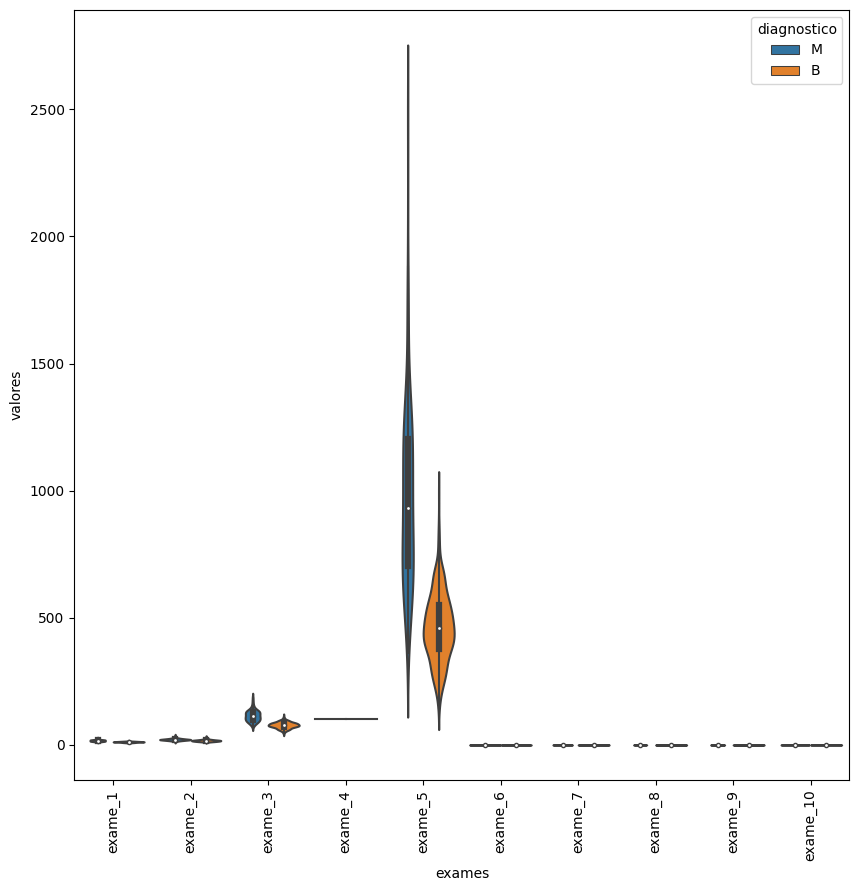

In [8]:
#visualização usando violinplot
import seaborn as sns
import matplotlib.pyplot as plt

#formatando para ter a exibição como desejamos
dados_plot = pd.concat([diagnostico,valores_exames_v1.iloc[:,0:10]],axis=1)
dados_plot = pd.melt(dados_plot, id_vars='diagnostico',
                     var_name='exames',
                     value_name='valores')
plt.figure(figsize=(10,10))
sns.violinplot(x= 'exames',y = 'valores',
               hue='diagnostico',data = dados_plot)
plt.xticks(rotation= 90)


(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'exame_1'),
  Text(1, 0, 'exame_2'),
  Text(2, 0, 'exame_3'),
  Text(3, 0, 'exame_4'),
  Text(4, 0, 'exame_5'),
  Text(5, 0, 'exame_6'),
  Text(6, 0, 'exame_7'),
  Text(7, 0, 'exame_8'),
  Text(8, 0, 'exame_9'),
  Text(9, 0, 'exame_10')])

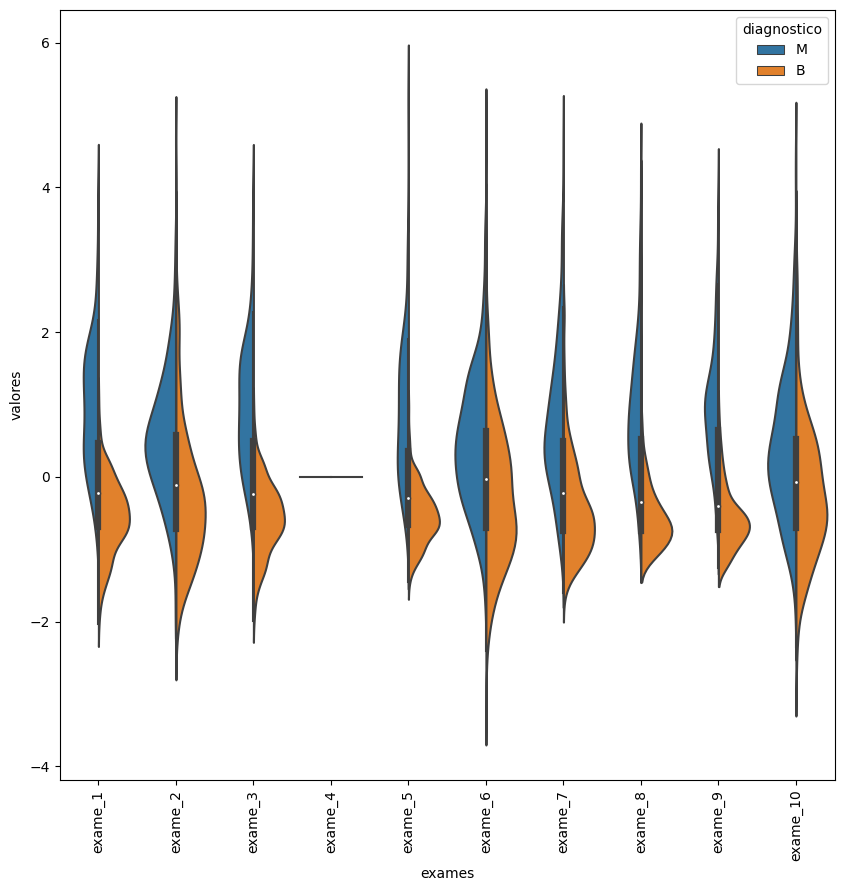

In [9]:
#visualização usando violinplot
#usando StandardScaller
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(valores_exames_v1)
valores_exames_v2 = scaler.transform(valores_exames_v1)
valores_exames_v2 = pd.DataFrame ( data = valores_exames_v2,
                                  columns = valores_exames_v1.keys())
#formatando para ter a exibição como desejamos
dados_plot = pd.concat([diagnostico,valores_exames_v2.iloc[:,0:10]],axis=1)
dados_plot = pd.melt(dados_plot, id_vars='diagnostico',
                     var_name='exames',
                     value_name='valores')
plt.figure(figsize=(10,10))
sns.violinplot(x= 'exames',y = 'valores',
               hue='diagnostico',data = dados_plot,split = True)
plt.xticks(rotation= 90)

In [10]:
valores_exames_v2.exame_4


0      1.421085e-14
1      1.421085e-14
2      1.421085e-14
3      1.421085e-14
4      1.421085e-14
           ...     
564    1.421085e-14
565    1.421085e-14
566    1.421085e-14
567    1.421085e-14
568    1.421085e-14
Name: exame_4, Length: 569, dtype: float64

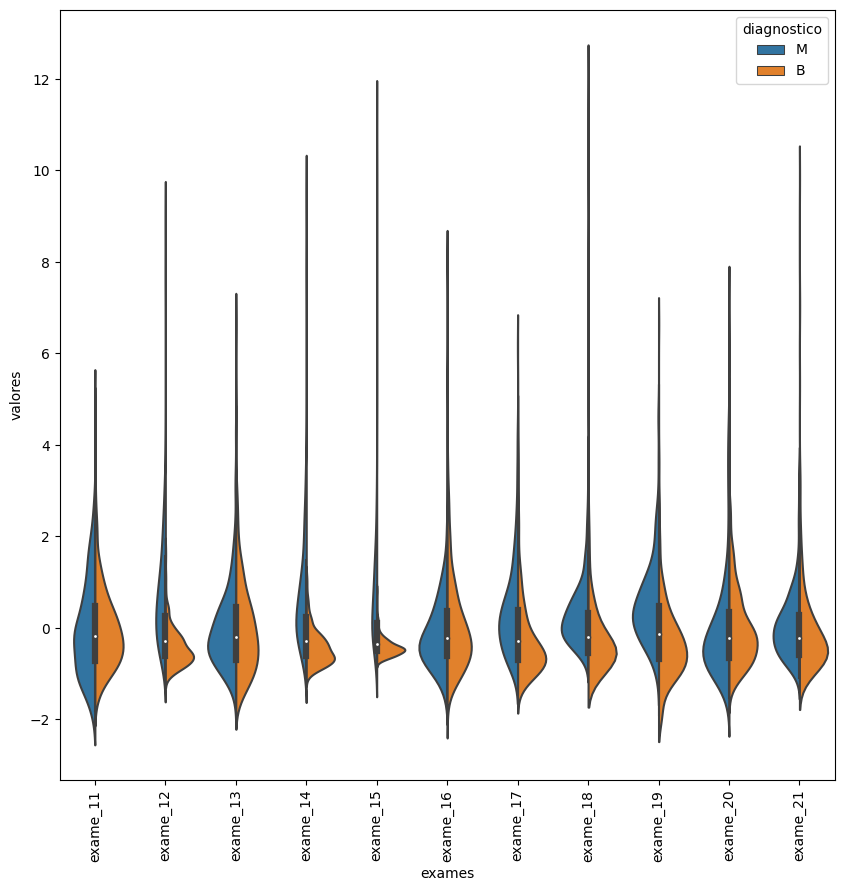

In [13]:
def grafico_violino(valores, inicio, fim):

  dados_plot = pd.concat([diagnostico,valores.iloc[:,inicio:fim]],axis=1)
  dados_plot = pd.melt(dados_plot, id_vars='diagnostico',
                     var_name="exames",
                     value_name='valores')
  plt.figure(figsize=(10,10))
  sns.violinplot(x= "exames", y = "valores",hue="diagnostico",
               data = dados_plot, split = True)
  plt.xticks(rotation= 90)

grafico_violino(valores_exames_v2, 10, 21)


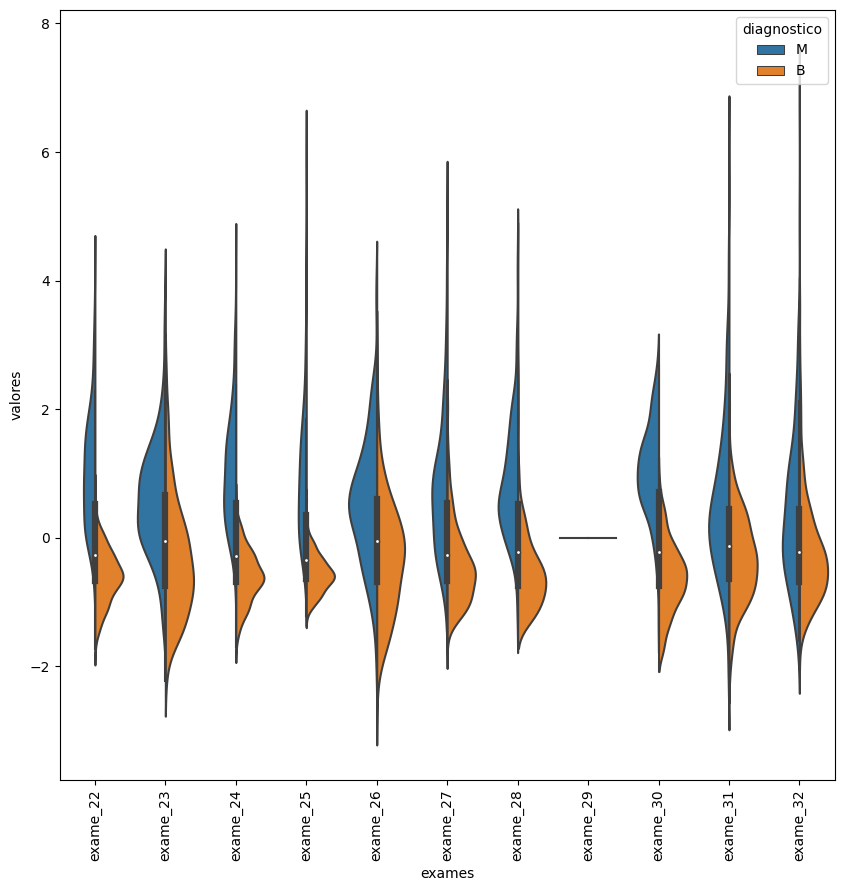

In [14]:
grafico_violino(valores_exames_v2,21,32)

In [15]:
valores_exames_v3 = valores_exames_v2.drop(columns=['exame_29','exame_4'])

In [21]:
def classificar(valores):
    SEED = 1234
    random.seed(SEED)
    treino_x,teste_x,treino_y,teste_y = train_test_split(valores,diagnostico,test_size=0.3)
    classificador = RandomForestClassifier(n_estimators = 100)
    classificador.fit(treino_x,treino_y)
    print("Resultado da classificação %2f%%" %(classificador.score(teste_x,teste_y)*100))

classificar(valores_exames_v3)

Resultado da classificação 92.982456%


In [22]:
valores_exames_v3.corr()

,exame_1,exame_2,exame_3,exame_5,exame_6,exame_7,exame_8,exame_9,exame_10,exame_11,...,exame_22,exame_23,exame_24,exame_25,exame_26,exame_27,exame_28,exame_30,exame_31,exame_32
exame_1,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,0.147741,-0.311631,...,0.969539,0.297008,0.965137,0.941082,0.119616,0.413463,0.526911,0.744214,0.163953,0.007066
exame_2,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,0.071401,-0.076437,...,0.352573,0.912045,0.358040,0.343546,0.077503,0.277830,0.301025,0.295316,0.105008,0.119205
exame_3,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,0.183027,-0.261477,...,0.969476,0.303038,0.970387,0.941550,0.150549,0.455774,0.563879,0.771241,0.189115,0.051019
exame_5,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,0.151293,-0.283110,...,0.962746,0.287489,0.959120,0.959213,0.123523,0.390410,0.512606,0.722017,0.143570,0.003738
exame_6,0.170581,-0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,0.557775,0.584792,...,0.213120,0.036072,0.238853,0.206718,0.805324,0.472468,0.434926,0.503053,0.394309,0.499316
exame_7,0.506124,0.236702,0.556936,0.498502,0.659123,1.000000,0.883121,0.831135,0.602641,0.565369,...,0.535315,0.248133,0.590210,0.509604,0.565541,0.865809,0.816275,0.815573,0.510223,0.687382
exame_8,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,0.500667,0.336783,...,0.688236,0.299879,0.729565,0.675987,0.448822,0.754968,0.884103,0.861323,0.409464,0.514930
exame_9,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,0.462497,0.166917,...,0.830318,0.292752,0.855923,0.809630,0.452753,0.667454,0.752399,0.910155,0.375744,0.368661
exame_10,0.147741,0.071401,0.183027,0.151293,0.557775,0.602641,0.500667,0.462497,1.000000,0.479921,...,0.185728,0.090651,0.219169,0.177193,0.426675,0.473200,0.433721,0.430297,0.699826,0.438413
exame_11,-0.311631,-0.076437,-0.261477,-0.283110,0.584792,0.565369,0.336783,0.166917,0.479921,1.000000,...,-0.253691,-0.051269,-0.205151,-0.231854,0.504942,0.458798,0.346234,0.175325,0.334019,0.767297


<Axes: >

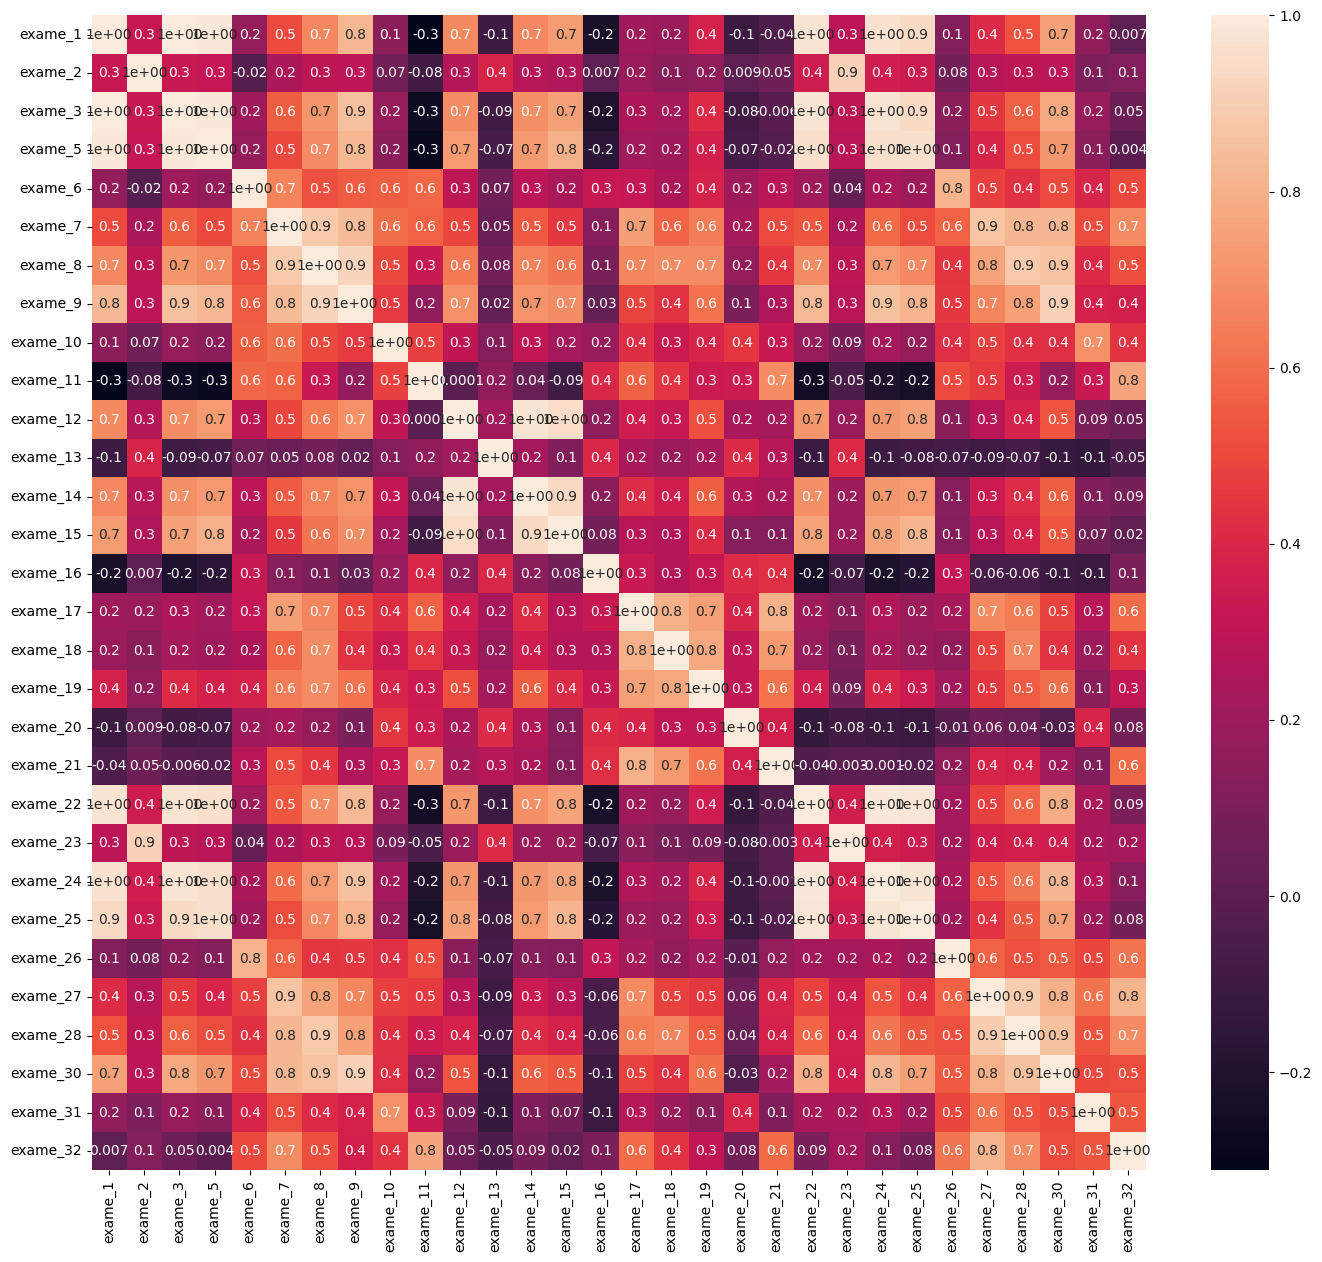

In [25]:
#mapa de calor do seaborn para matriz de correlação
matriz_correlacao = valores_exames_v3.corr()
plt.figure(figsize = (17,15))
sns.heatmap(matriz_correlacao,annot = True,fmt =".1")

In [26]:
#criar de modo automatizado maior que 0.99
matriz_correlacao_v1 = matriz_correlacao[matriz_correlacao>0.99]
matriz_correlacao_v1

,exame_1,exame_2,exame_3,exame_5,exame_6,exame_7,exame_8,exame_9,exame_10,exame_11,...,exame_22,exame_23,exame_24,exame_25,exame_26,exame_27,exame_28,exame_30,exame_31,exame_32
exame_1,1.000000,NaN,0.997855,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
exame_2,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
exame_3,0.997855,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
exame_5,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
exame_6,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
exame_7,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
exame_8,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
exame_9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
exame_10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
exame_11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [27]:
matriz_correlacao_v2 = matriz_correlacao_v1.sum()


In [28]:
matriz_correlacao_v2

exame_1     1.997855
exame_2     1.000000
exame_3     1.997855
exame_5     1.000000
exame_6     1.000000
exame_7     1.000000
exame_8     1.000000
exame_9     1.000000
exame_10    1.000000
exame_11    1.000000
exame_12    1.000000
exame_13    1.000000
exame_14    1.000000
exame_15    1.000000
exame_16    1.000000
exame_17    1.000000
exame_18    1.000000
exame_19    1.000000
exame_20    1.000000
exame_21    1.000000
exame_22    1.993708
exame_23    1.000000
exame_24    1.993708
exame_25    1.000000
exame_26    1.000000
exame_27    1.000000
exame_28    1.000000
exame_30    1.000000
exame_31    1.000000
exame_32    1.000000
dtype: float64

In [31]:
variaveis_correlacionadas = matriz_correlacao_v2[matriz_correlacao_v2>1]

In [32]:
variaveis_correlacionadas

exame_1     1.997855
exame_3     1.997855
exame_22    1.993708
exame_24    1.993708
dtype: float64

In [34]:
#excluir as variaveis correlacionadas do dataset
#note que devemos deixar algumas das variáveis para não afetar o score
valores_exames_v4 = valores_exames_v3.drop(columns= variaveis_correlacionadas.keys())

In [38]:
valores_exames_v5 = valores_exames_v3.drop(columns=['exame_3','exame_24'])

In [42]:
classificar(valores_exames_v5)

Resultado da classificação 92.982456%


In [45]:
#select k best - para selecionar as melhores features do banco de dados
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

kmelhores = SelectKBest(chi2,k = 5)


In [48]:
valores_exames_v6 = valores_exames_v1.drop(columns=["exame_4","exame_29","exame_3","exame_24"])

In [56]:
SEED = 1234
random.seed(SEED)
treino_x,teste_x,treino_y,teste_y = train_test_split(
    valores_exames_v6,diagnostico,
    test_size=0.3
)
kmelhores.fit(treino_x,treino_y)

SelectKBest(k=5, score_func=<function chi2 at 0x7ce4797df5b0>)

In [57]:
treino_kbest = kmelhores.transform(treino_x)
teste_kbest = kmelhores.transform(teste_x)


In [58]:
treino_kbest.shape

(398, 5)

In [59]:
classificador = RandomForestClassifier(n_estimators= 100,random_state=1234)
classificador.fit(treino_kbest,treino_y)
print("Resultado da classificação kbest %.2f%%" %(classificador.score(teste_kbest,teste_y)*100))

Resultado da classificação kbest 92.40%


In [63]:
#matriz de confusão
from sklearn.metrics import confusion_matrix

matriz_confusao = confusion_matrix(teste_y,classificador.predict(
    teste_kbest))


In [64]:
matriz_confusao

array([[100,   5],
       [  8,  58]])

[Text(0.5, 40.249999999999986, 'Predição'), Text(77.25, 0.5, 'Real')]

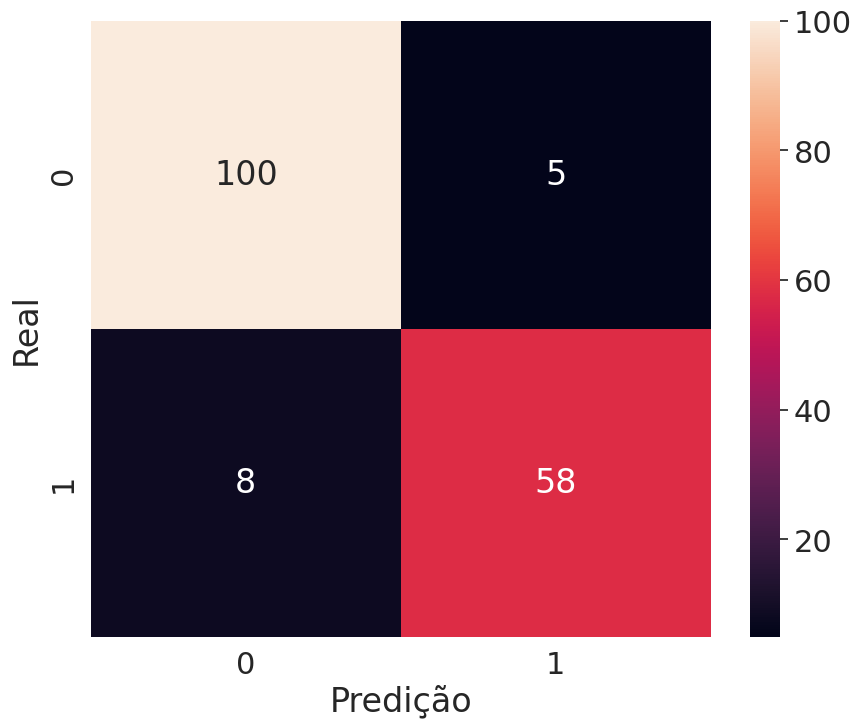

In [67]:
#recurso visual para matriz
plt.figure(figsize=(10,8))
sns.set(font_scale=2)
sns.heatmap(matriz_confusao,annot=True,fmt="d").set(xlabel="Predição",ylabel="Real")

Nessa nova técnica, por meio da acurácia, que será nossa forma de avaliação, nosso classificador saberá qual das features é mais importante pra ele, descartando as de menor acurácia.

Resultado da classificação RFE 90.06%


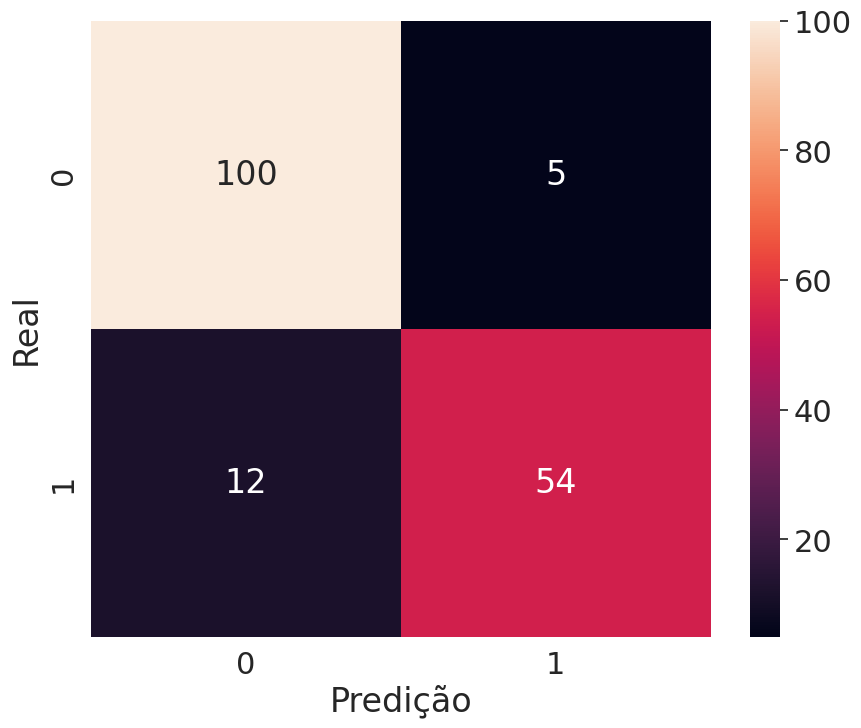

In [69]:
from sklearn.feature_selection import RFE
SEED= 1234
random.seed(SEED)
treino_x,teste_x,treino_y,teste_y = train_test_split(
    valores_exames_v6,
    diagnostico,
    test_size=0.3
)


classificador = RandomForestClassifier(n_estimators=100,random_state=1234)
classificador.fit(treino_x,treino_y)
selecionar_rfe = RFE(estimator = classificador,n_features_to_select=5, step=1)
selecionar_rfe.fit(treino_x,treino_y)
treino_rfe = selecionar_rfe.transform(treino_x)
teste_rfe = selecionar_rfe.transform(teste_x)
classificador.fit(treino_rfe,treino_y)
matriz_confusao =confusion_matrix(teste_y,classificador.predict(teste_rfe))
plt.figure(figsize=(10,8))
sns.set(font_scale=2)
sns.heatmap(matriz_confusao,annot=True,fmt="d").set(xlabel="Predição",ylabel="Real")

print("Resultado da classificação RFE %.2f%%" %(classificador.score(teste_rfe,teste_y)*100))